In [6]:
import numpy as np
import skfuzzy as fuzzy
import skfuzzy.control as ctrl
import matplotlib.pyplot as plt

In [9]:
# 建立輸入與輸出變數的範圍 (數值範圍)
input1_range = np.arange(0, 20, 1)   # 輸入變數1的範圍：0 到 19
input2_range = np.arange(0, 20, 1)   # 輸入變數2的範圍：0 到 19
output_range = np.arange(0, 26, 1)   # 輸出變數的範圍：0 到 25

# 定義模糊控制變數
# ctrl.Antecedent = 輸入變數 (前件)
# ctrl.Consequent = 輸出變數 (後件)
input1 = ctrl.Antecedent(input1_range, 'input1')  # 建立輸入變數1，名稱為 'input1'
input2 = ctrl.Antecedent(input2_range, 'input2')  # 建立輸入變數2，名稱為 'input2'
output = ctrl.Consequent(output_range, 'output')  # 建立輸出變數，名稱為 'output'

In [10]:
# 定義 input1 的模糊集合（隸屬函數）
# fuzzy.trimf() 表示使用「三角形隸屬函數」（Triangular Membership Function）
input1['N'] = fuzzy.trimf(input1_range, [0, 0, 5])   # 「N」代表低值（Negative），範圍 0 到 5
input1['M'] = fuzzy.trimf(input1_range, [0, 5, 10])  # 「M」代表中值（Medium），範圍 0 到 10
input1['P'] = fuzzy.trimf(input1_range, [5, 10, 10]) # 「P」代表高值（Positive），範圍 5 到 10

# 定義 input2 的模糊集合（隸屬函數）
input2['N'] = fuzzy.trimf(input2_range, [0, 0, 5])   # 低值
input2['M'] = fuzzy.trimf(input2_range, [0, 5, 10])  # 中值
input2['P'] = fuzzy.trimf(input2_range, [5, 10, 10]) # 高值

# 定義 output 的模糊集合（隸屬函數）
output['N'] = fuzzy.trimf(output_range, [0, 0, 13])   # 低輸出
output['M'] = fuzzy.trimf(output_range, [0, 13, 25])  # 中輸出
output['P'] = fuzzy.trimf(output_range, [13, 25, 25]) # 高輸出

In [ ]:
# 定義模糊規則
rule0 = ctrl.Rule(
    antecedent=(
        (input1['N'] & input2['N']) | 
        (input1['M'] & input2['N'])
    ),
    consequent=output['N'], label='rule N'
)

rule1 = ctrl.Rule(
    antecedent=(
        (input1['P'] & input2['N']) |
        (input1['N'] & input2['M']) |
        (input1['M'] & input2['M']) |
        (input1['P'] & input2['M']) |
        (input1['N'] & input2['P'])
    ),
    consequent=output['M'], label='rule M'
)

rule2 = ctrl.Rule(
    antecedent=(
        (input1['M'] & input2['P']) |
        (input1['P'] & input2['P'])
    ),
    consequent=output['P'], label='rule P'
)

# 建立模糊控制系統
system = ctrl.ControlSystem(rules=[rule0, rule1, rule2])
sim = ctrl.ControlSystemSimulation(system)

模糊控制輸出結果: 12.398119122257052


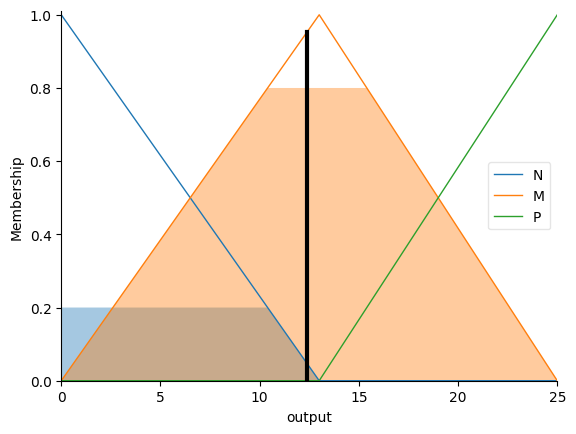

In [13]:
# 設定模擬輸入數值
sim.input['input1'] = 6  # 輸入變數1數值
sim.input['input2'] = 4  # 輸入變數2數值

# 執行模糊推論
sim.compute()

# 顯示輸出結果
print("模糊控制輸出結果:", sim.output['output'])

# 畫出輸出變數隸屬函數圖
output.view(sim=sim)  # 顯示輸入後的輸出圖（包含 defuzzified 結果）
plt.show()